# Final Project RMT-043 Group 02

Notebook ini berisi code untuk menampilkan plot hasil Exploratory Data Analysis (EDA) dari dataset yang telah dibersihkan sesuai kebutuhan visualisasi. EDA ini dilakukan untuk melihat karakteristik data.


In [1]:
# 1. Import Library & Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Styling
sns.set(style="whitegrid")

# Load dataset
file_path = "eda.csv"
df = pd.read_csv(file_path)

# Preview
df.head()

,brand_name,product_name,product_variant,full_name_product,price,ratings,total_review,review_processed,kategori_harga,kategori_rating,...,turut,dipake,manis,produk_lengkap,age_18_24,age_25_29,age_30_34,age_35_39,age_40_44,age_unknown
0,HINT,Fatale Extrait de Parfum,-,Fatale Extrait de Parfum,249000,4.2,894,dari awal semprot udah rasa beda ada mani blac...,Sedang,Sedang,...,0,2,4,HINT - Fatale Extrait de Parfum,11,2,0,0,0,False
1,The Body Shop,White Musk Eau de Parfum,-,White Musk Eau de Parfum,329000,4.3,604,damn dulu aku cium parfum ini slalu kek gaksuk...,Mahal,Sedang,...,2,1,1,The Body Shop - White Musk Eau de Parfum,2,4,0,0,1,False
2,Saff & Co.,S.O.T.B Extrait de Parfum,-,S.O.T.B Extrait de Parfum,220000,4.1,568,s o t b usung wangi citru floral hangat top no...,Sedang,Sedang,...,1,2,3,Saff & Co. - S.O.T.B Extrait de Parfum,1,3,0,3,0,False
3,HMNS Perfume,Orgasm,-,Orgasm,298000,4.0,515,aku beli perfum ini karena penasaran kaya gima...,Sedang,Sedang,...,5,1,4,HMNS Perfume - Orgasm,2,4,0,0,1,False
4,Evangeline,Eau De Perfume Sakura Series,Black Sakura,Eau De Perfume Sakura Series Black Sakura,30000,4.1,442,varian parfum evangelin yang pale aku suka wan...,Murah,Sedang,...,4,0,8,Evangeline - Eau De Perfume Sakura Series,1,1,0,1,1,False


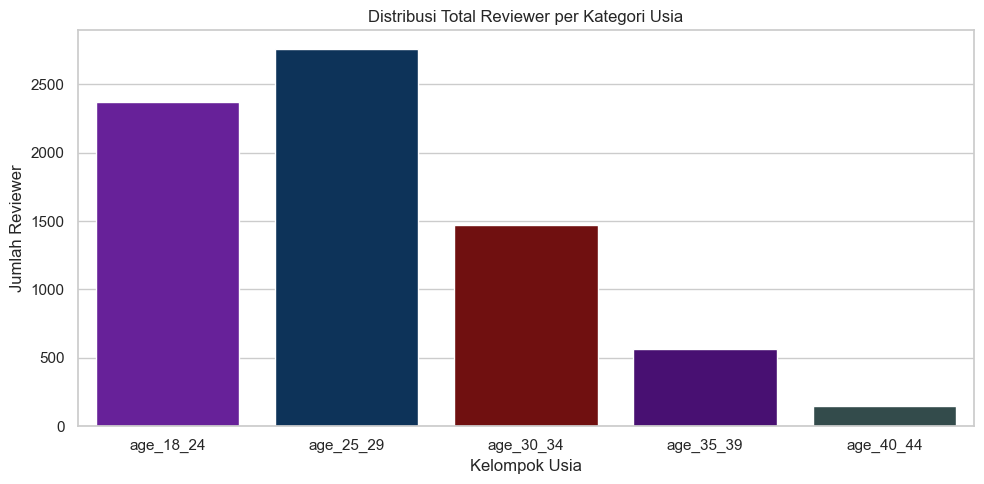

In [2]:
# Distribusi Reviewer Berdasarkan Usia
age_cols = ['age_18_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44']
total_usia = df[age_cols].sum().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=total_usia.index, y=total_usia.values, palette=["#6A0DAD", "#003366", "#800000", "#4B0082", "#2F4F4F"], hue=total_usia.index, legend=False)
plt.title("Distribusi Total Reviewer per Kategori Usia")
plt.ylabel("Jumlah Reviewer")
plt.xlabel("Kelompok Usia")
plt.tight_layout()
plt.show()

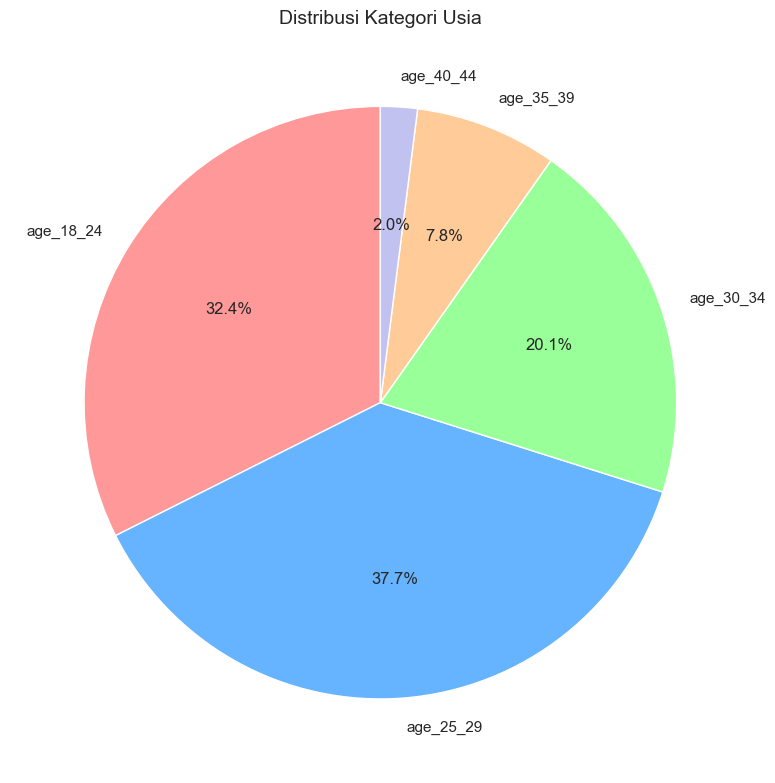

In [3]:
# Pie Chart untuk Age Category
age_category_counts = df[['age_18_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44']].sum()

plt.figure(figsize=(8, 8))
age_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], startangle=90)
plt.title('Distribusi Kategori Usia', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

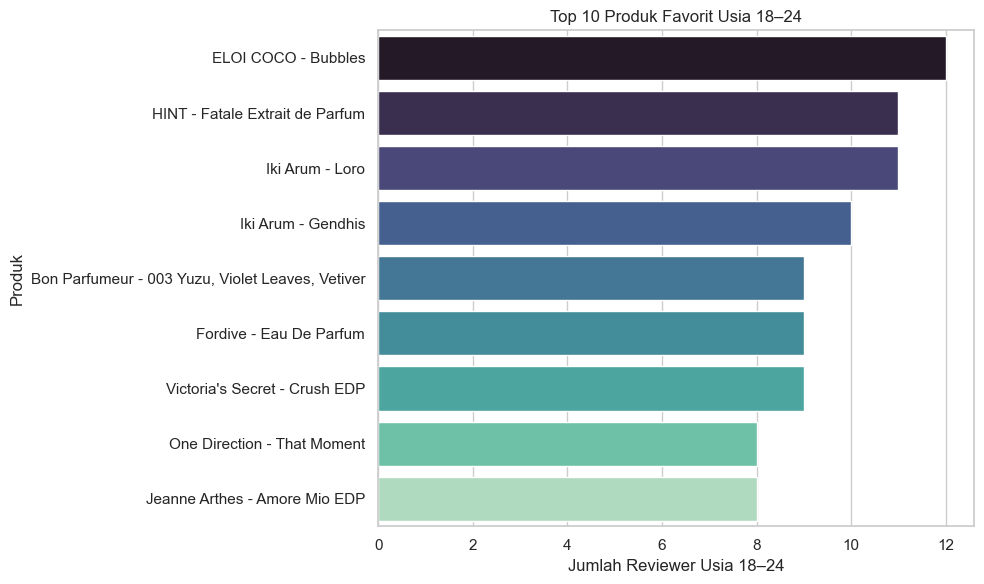

In [4]:
# Top 10 Produk Favorit Usia 18-24
top_young = df[['produk_lengkap', 'age_18_24']].sort_values(by='age_18_24', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y='produk_lengkap', x='age_18_24', data=top_young, palette='mako', hue='produk_lengkap', legend=False)
plt.title("Top 10 Produk Favorit Usia 18–24")
plt.xlabel("Jumlah Reviewer Usia 18–24")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()

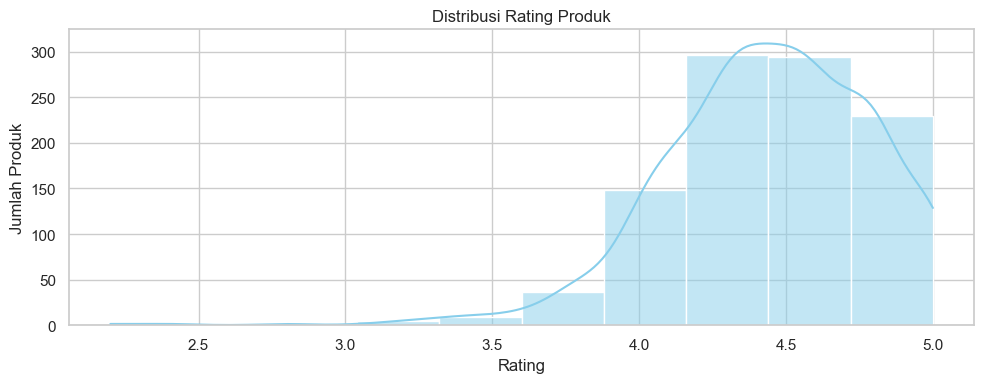

In [5]:
# Histogram Distribusi Rating
plt.figure(figsize=(10, 4))
sns.histplot(df['ratings'], bins=10, kde=True, color='skyblue')
plt.title("Distribusi Rating Produk")
plt.xlabel("Rating")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

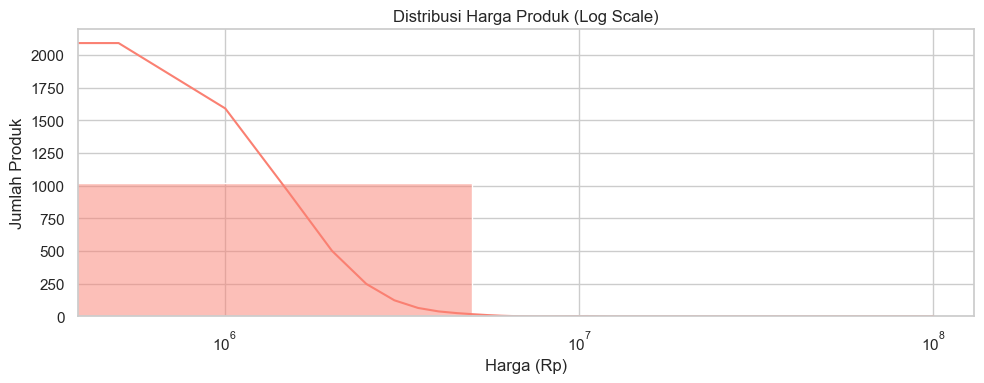

In [6]:
# Histogram Distribusi Harga
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=20, kde=True, color='salmon')
plt.xscale('log')
plt.title("Distribusi Harga Produk (Log Scale)")
plt.xlabel("Harga (Rp)")
plt.ylabel("Jumlah Produk")
plt.tight_layout()
plt.show()

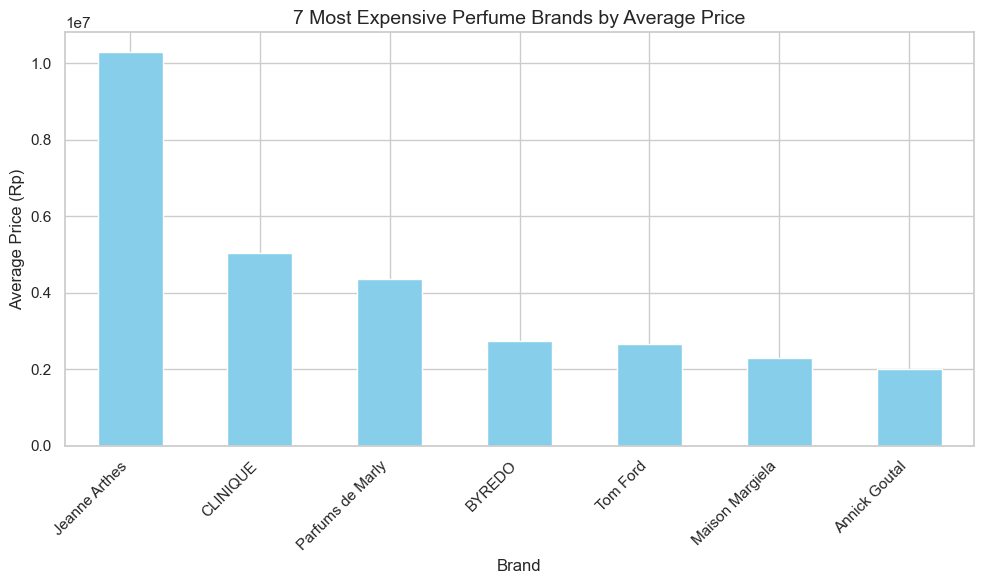

In [11]:
# Most expensive perfume brands
average_price_per_brand = df.groupby('brand_name')['price'].mean()
top_7_expensive_brands = average_price_per_brand.sort_values(ascending=False).head(7)

plt.figure(figsize=(10, 6))
top_7_expensive_brands.plot(kind='bar', color='skyblue')
plt.title('7 Most Expensive Perfume Brands by Average Price', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price (Rp)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

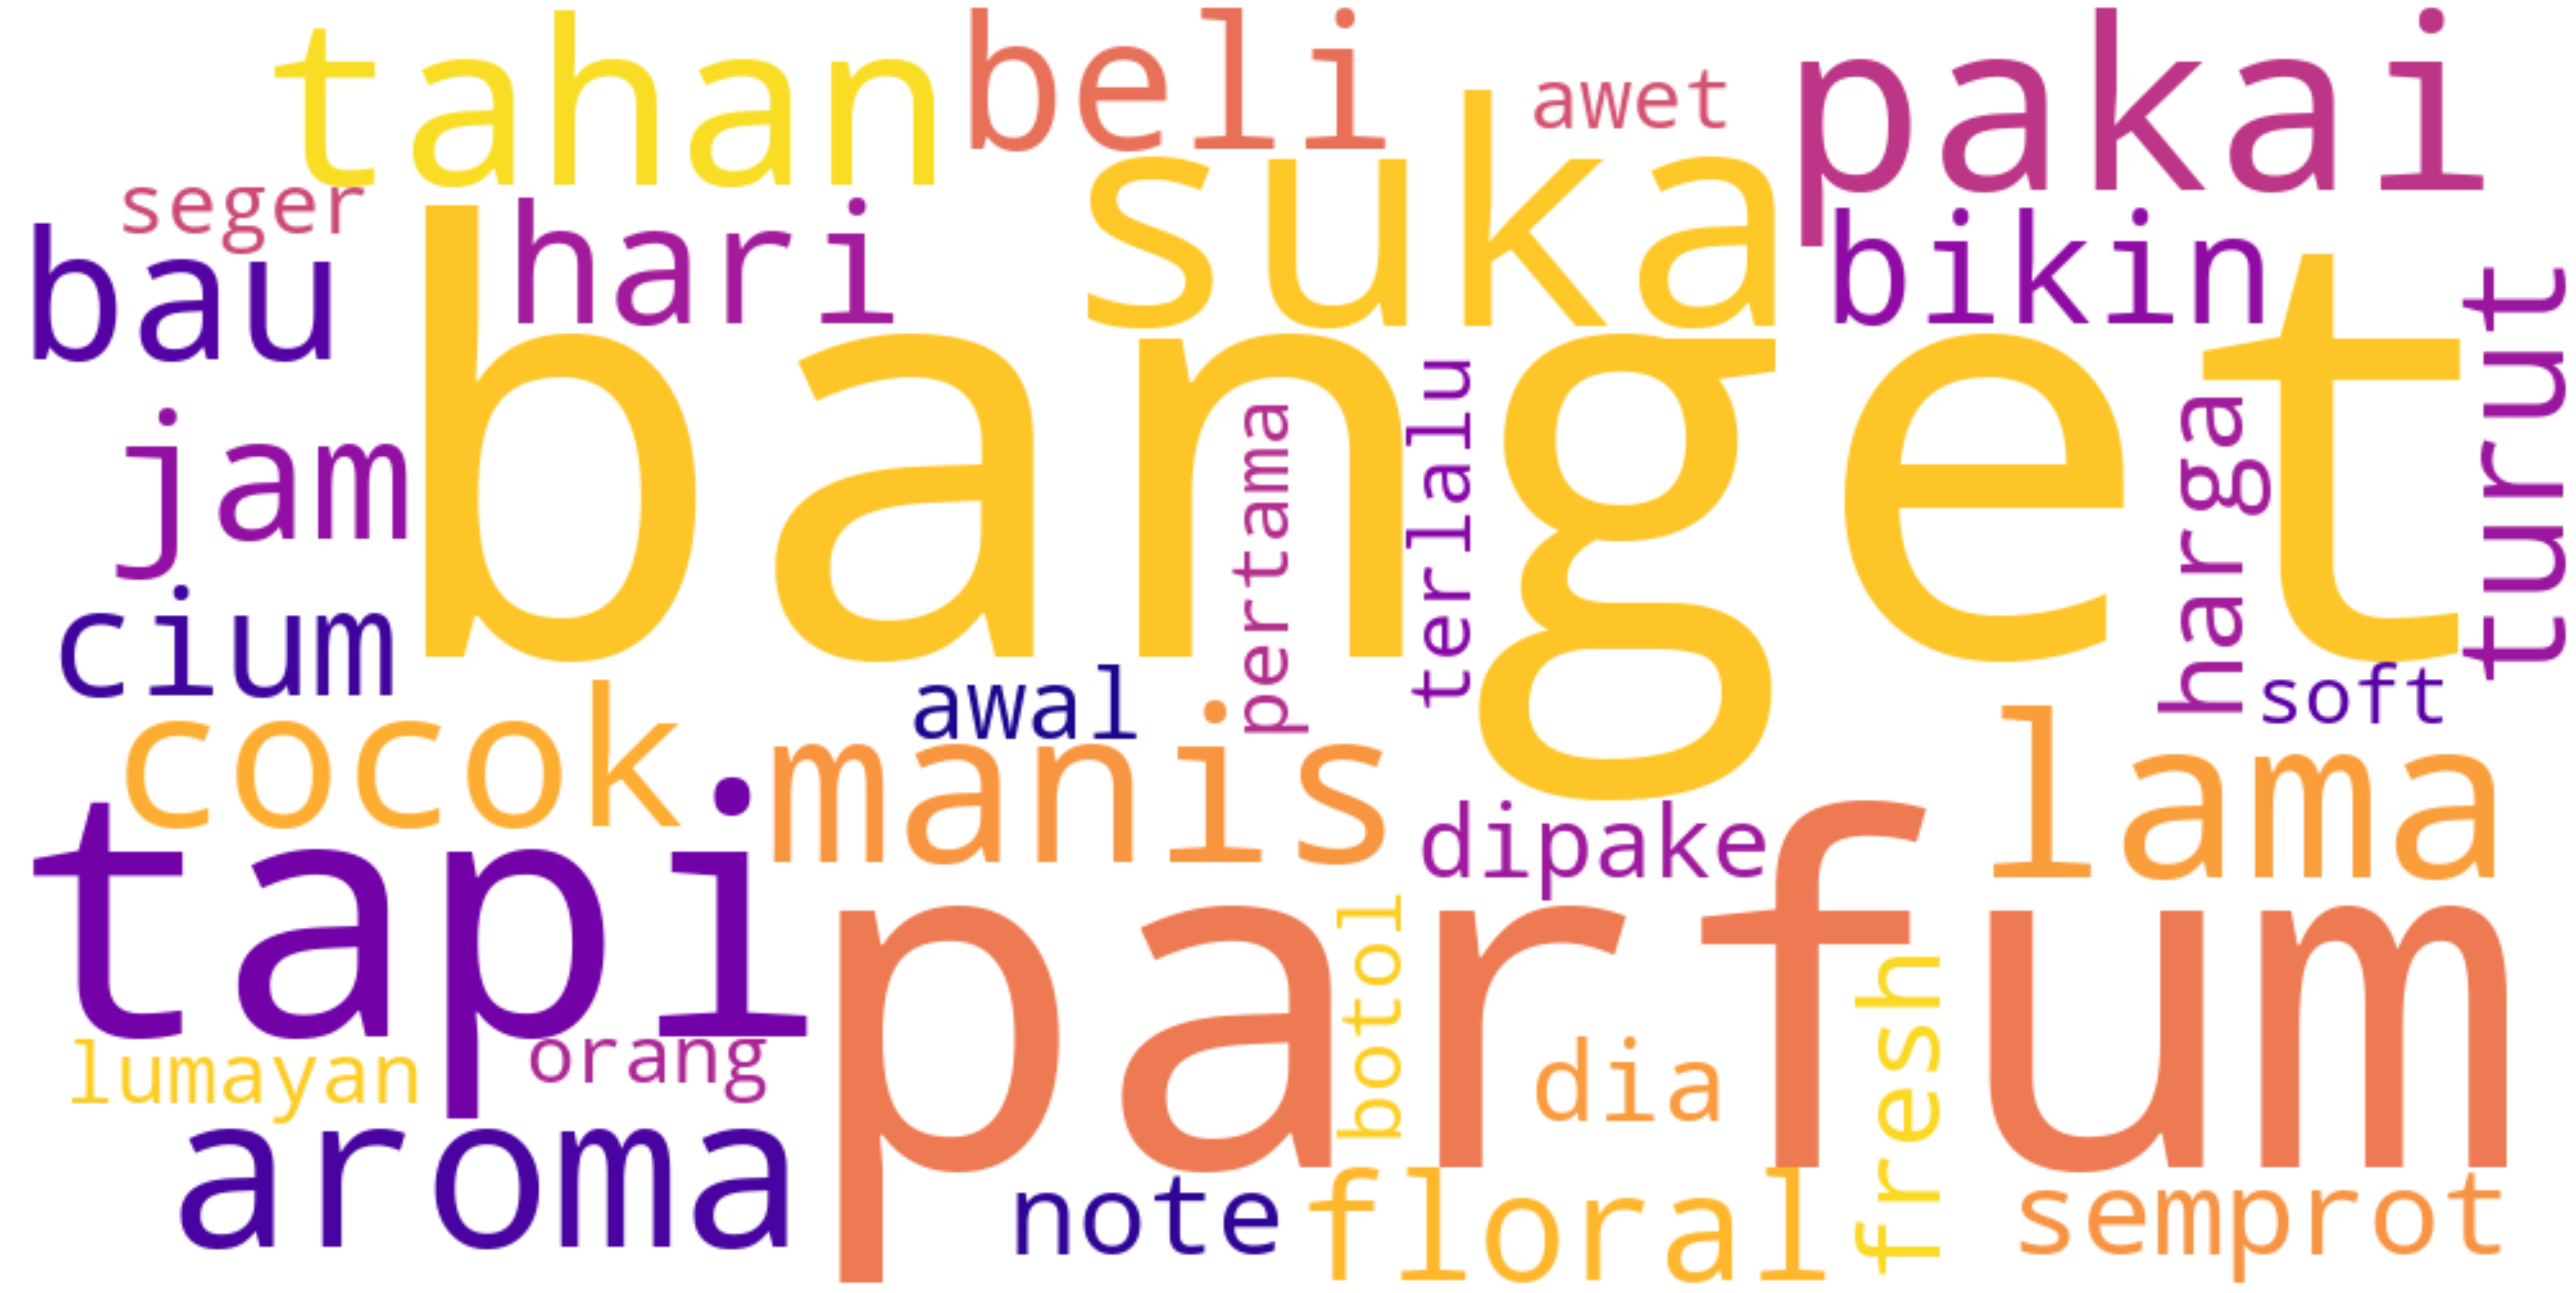

In [7]:
# Wordcloud untuk kata umum dalam review produk
start_idx = df.columns.get_loc('aroma')
end_idx = df.columns.get_loc('manis') + 1
keyword_cols = df.columns[start_idx:end_idx]
keyword_freq = df[keyword_cols].sum().to_dict()

wordcloud = WordCloud(width=1000, height=500, background_color="white", colormap="plasma")
wordcloud.generate_from_frequencies(keyword_freq)

plt.figure(figsize=(50, 25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

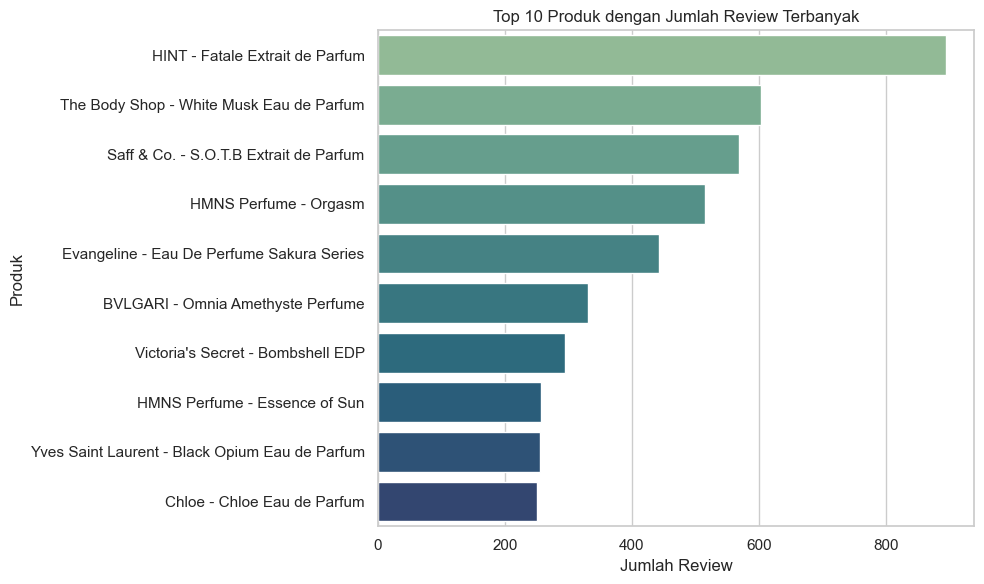

In [8]:
# Jumlah Review Terbanyak per Produk (Top 10)
df_final = df.copy()
top_reviewed = df_final[['produk_lengkap', 'total_review']].sort_values(by='total_review', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_review', y='produk_lengkap', data=top_reviewed, palette='crest', hue='produk_lengkap', legend=False)
plt.title("Top 10 Produk dengan Jumlah Review Terbanyak")
plt.xlabel("Jumlah Review")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()

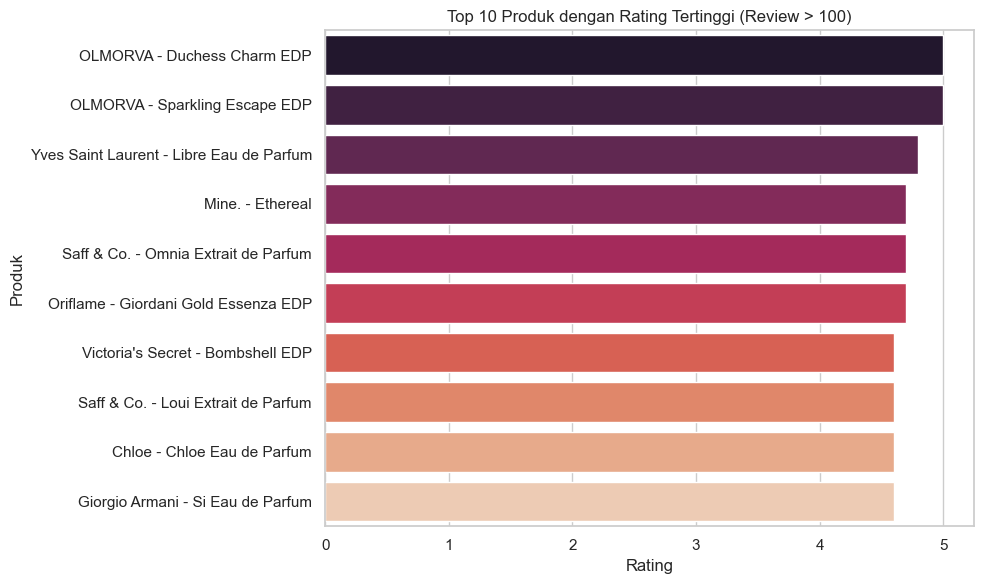

In [9]:
# Produk Rating Tertinggi (Top 10 dengan review > 100)
top_rated = df_final[df_final['total_review'] > 100][['produk_lengkap', 'ratings']].sort_values(by='ratings', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='ratings', y='produk_lengkap', data=top_rated, palette='rocket', hue='produk_lengkap', legend=False)
plt.title("Top 10 Produk dengan Rating Tertinggi (Review > 100)")
plt.xlabel("Rating")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()

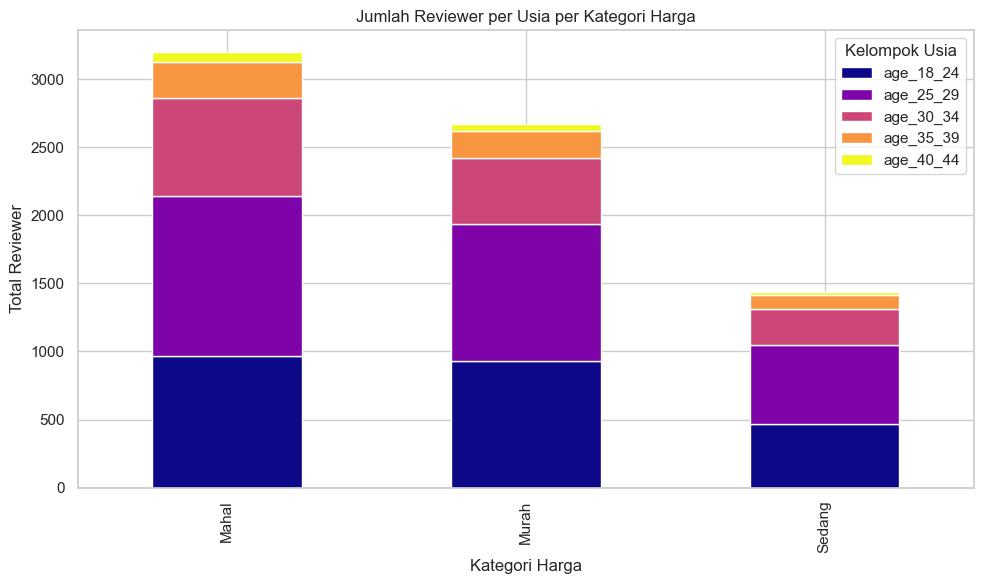

In [10]:
# Stacked Bar: Total Reviewer per Usia per Kategori Harga
usia_cols = ['age_18_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44']
stacked_df = df_final.groupby('kategori_harga')[usia_cols].sum()

stacked_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='plasma')
plt.title("Jumlah Reviewer per Usia per Kategori Harga")
plt.ylabel("Total Reviewer")
plt.xlabel("Kategori Harga")
plt.legend(title="Kelompok Usia")
plt.tight_layout()
plt.show()
